<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Giảm chiều dữ liệu với phân tích thành phần chính (PCA)**

Thời gian ước tính: **20** phút

Dự án này dựa trên [hướng dẫn của IBM developer](https://developer.ibm.com/tutorials/awb-reducing-dimensionality-with-principal-component-analysis/) của Eda Kavlakoglu.
<center>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0YXXEN/images/pca%20logo.jpg" width="600px" alt="image">
</center>
<br>

Phân tích thành phần chính (PCA) là một kỹ thuật giảm chiều dữ liệu bằng cách chuyển đổi các biến có tương quan thành một tập hợp các biến không tương quan nhỏ hơn, gọi là các thành phần chính. Phương pháp học không giám sát này giúp tiền xử lý dữ liệu bằng cách đơn giản hóa dữ liệu có chiều cao, giảm độ phức tạp của mô hình và giải quyết các vấn đề như đa cộng tuyến và quá khớp. PCA hữu ích trong việc cải thiện việc trực quan hóa dữ liệu và hiệu suất mô hình, đặc biệt trong các thuật toán như hồi quy tuyến tính và hồi quy logistic. Bài tổng quan này tập trung vào PCA chuẩn, mặc dù cũng có các biến thể như kernel PCA.

Trong dự án thực hành này, bạn sẽ sử dụng Python để áp dụng PCA vào bộ dữ liệu [rượu vang](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html) phổ biến để minh họa cách giảm chiều dữ liệu trong bộ dữ liệu. Mỗi mẫu rượu vang trong bộ dữ liệu được phân loại vào một trong ba lớp (lớp 0, lớp 1 và lớp 2), cho biết nguồn gốc của nho. Mục tiêu là tối ưu hóa việc phân loại các lớp rượu vang này bằng PCA. Để biết thêm thông tin về bộ dữ liệu này, hãy tham khảo tài liệu trong [kho dữ liệu UCI ML](https://archive.ics.uci.edu/dataset/109/wine), nơi scikit-learn đã lấy bộ dữ liệu này.

---

# Mục tiêu

Sau khi hoàn thành bài tập này, bạn sẽ có thể:

1. **Khám phá Bộ Dữ Liệu**: Thực hiện phân tích dữ liệu khám phá để hiểu cấu trúc, loại biến và phân phối trong bộ dữ liệu rượu vang.

2. **Trực Quan Hóa Dữ Liệu**: Sử dụng biểu đồ cặp, biểu đồ tần suất và bản đồ nhiệt tương quan để khám phá các mối quan hệ và phân phối của các đặc trưng trong bộ dữ liệu.

3. **Chia Bộ Dữ Liệu**: Chia bộ dữ liệu thành các bộ huấn luyện và kiểm tra cho các mô hình tiếp theo.

4. **Chuẩn Hóa Dữ Liệu**: Thực hiện chuẩn hóa đặc trưng để chuẩn hóa dữ liệu, đảm bảo trung bình bằng không và độ lệch chuẩn bằng một, điều này rất quan trọng đối với PCA.

5. **Xác Định `n_components` Tối Ưu cho PCA**: Sử dụng biểu đồ phương sai giải thích và biểu đồ scree để xác định số lượng thành phần chính lý tưởng.

6. **Áp Dụng PCA**: Giảm chiều dữ liệu huấn luyện bằng PCA, tập trung vào việc giữ lại nhiều phương sai nhất.

7. **Trực Quan Hóa Kết Quả PCA**: Tạo biểu đồ phân tán để trực quan hóa các thành phần chính và quan sát sự phân tách giữa các loại rượu vang khác nhau.

8. **Tóm Tắt và Các Bước Tiếp Theo**: Kết luận với những hiểu biết có được từ việc áp dụng PCA và đề xuất các ứng dụng và cải tiến trong tương lai.

---


# Setup
### Installing Required Libraries


In [28]:
#!pip install --upgrade seaborn

### Nhập các Thư Viện Cần Thiết

_Chúng tôi khuyến nghị bạn nhập tất cả các thư viện cần thiết ở một nơi (ở đây):_


In [29]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Load the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

---


# Tải bộ dữ liệu Chất lượng Rượu Vang


In [30]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
X = df.iloc[: ,:13]
y = df['target']

column_names = df.columns
column_names = column_names.to_list()

---


# Khám Phá Bộ Dữ Liệu

Trước khi bắt đầu tiền xử lý dữ liệu, bạn nên thực hiện phân tích dữ liệu khám phá để hiểu cấu trúc và định dạng của dữ liệu, bao gồm loại biến, phân phối của chúng và tổ chức tổng thể của thông tin. Điều này giúp bạn xác định xem có cần thiết sử dụng PCA để mô hình hóa dữ liệu hay không.

Bạn có thể bắt đầu bằng cách hiểu kích thước của bộ dữ liệu, điều này giúp bạn nhận thấy rằng bộ dữ liệu của bạn có 13 chiều. Bạn có thể tiếp tục khám phá để xem liệu có đặc trưng nào có sự tương quan với nhau hay không, điều này chỉ ra nhu cầu tiềm năng về giảm chiều dữ liệu.


In [31]:
df.shape

(178, 14)

Hãy xem một số dòng mẫu từ bộ dữ liệu mà chúng ta đã tải:

In [32]:
df.sample(5)


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
116    11.82        1.47  1.99               20.8       86.0           1.98   
26     13.39        1.77  2.62               16.1       93.0           2.85   
155    13.17        5.19  2.32               22.0       93.0           1.74   
25     13.05        2.05  3.22               25.0      124.0           2.63   
142    13.52        3.17  2.72               23.5       97.0           1.55   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
116        1.60                  0.30             1.53             1.95  0.95   
26         2.94                  0.34             1.45             4.80  0.92   
155        0.63                  0.61             1.55             7.90  0.60   
25         2.68                  0.47             1.92             3.58  1.13   
142        0.52                  0.50             0.55             4.35  0.89   

     od280/od315_of_diluted_wines  proline  target  
116                          3.33    495.0       1  
26                           3.22   1195.0       0  
155                          1.48    725.0       2  
25                           3.20    830.0       0  
142                          2.06    520.0       2

Một số biểu đồ mà bạn có thể muốn sử dụng để khám phá dữ liệu bao gồm biểu đồ cặp, biểu đồ tần suất và bản đồ nhiệt tương quan. Vì đây là bộ dữ liệu có chiều cao, một số biểu đồ sẽ hiệu quả hơn những biểu đồ khác trong việc làm nổi bật các mối quan hệ giữa các biến.

---

# Biểu đồ cặp
Với số lượng chiều trong bộ dữ liệu này, biểu đồ cặp có thể không phải là biểu đồ hiệu quả nhất để xác định các mối quan hệ tương quan giữa các dữ liệu.


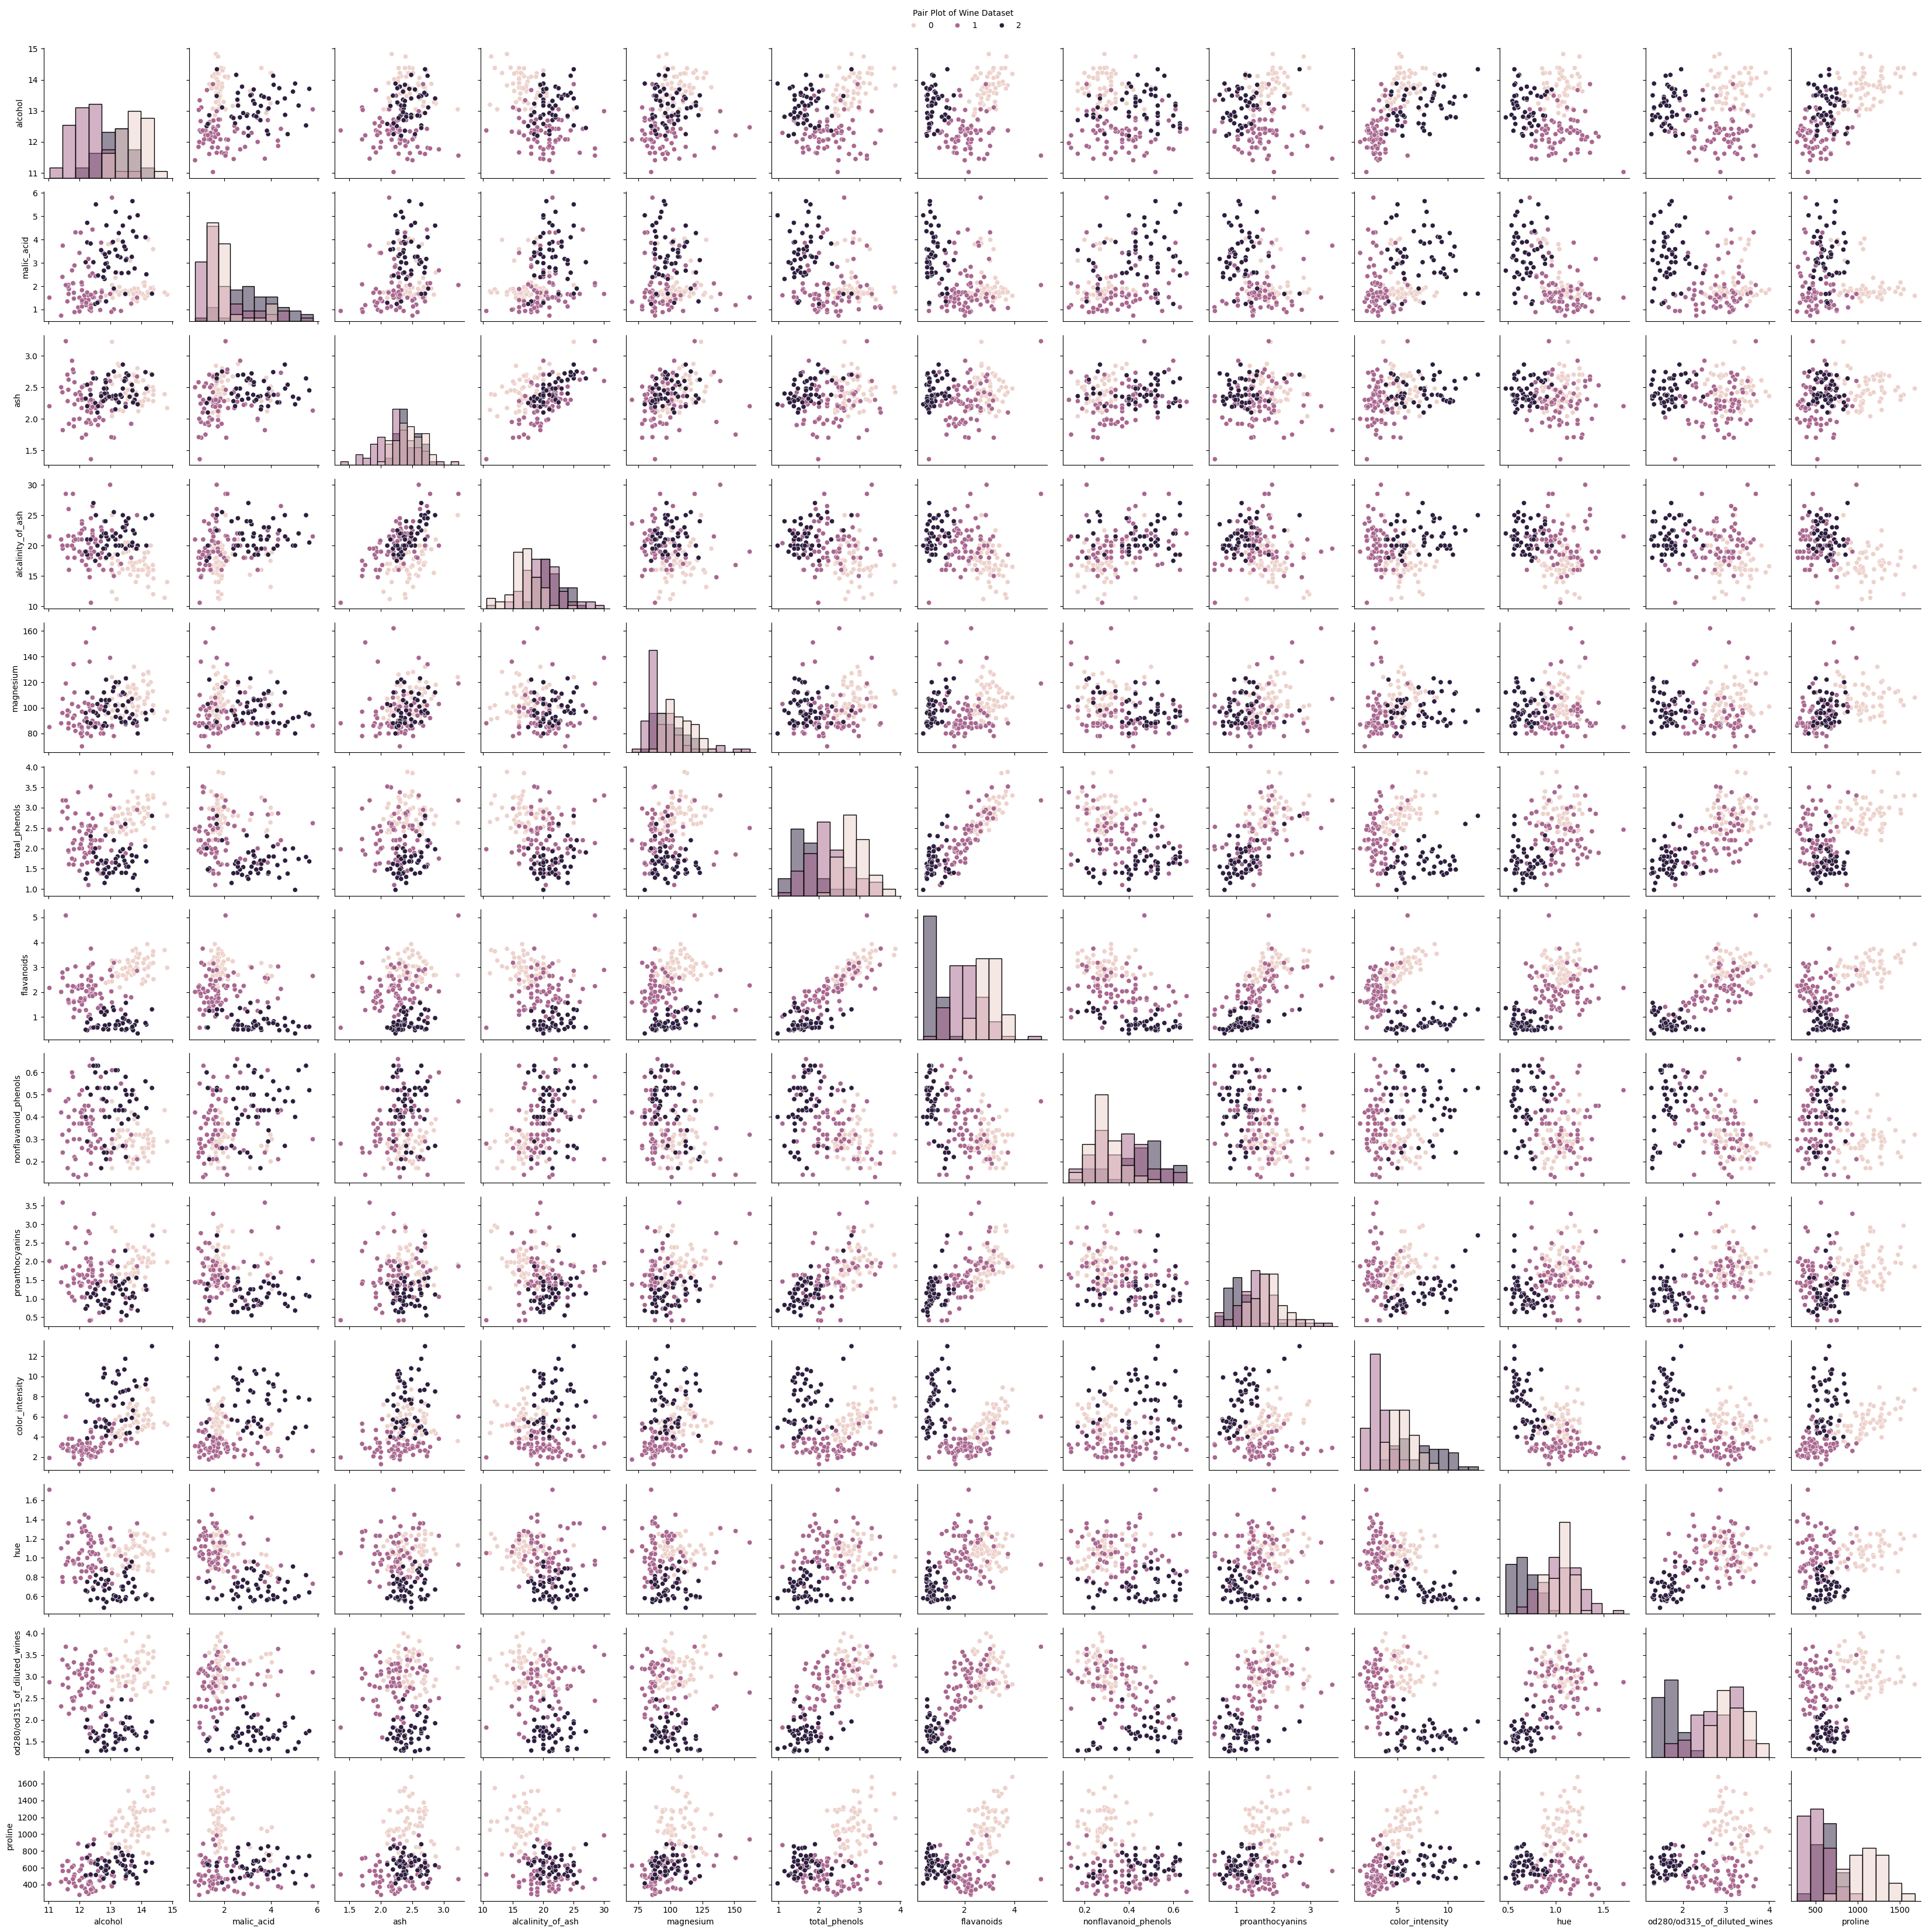

In [33]:
ax = sns.pairplot(df, hue='target', diag_kind="hist")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title="Pair Plot of Wine Dataset", frameon=False)

plt.tight_layout()
plt.show()

Mặc dù bạn có thể thấy các phân phối và hướng của bất kỳ mối quan hệ tương quan nào giữa các lớp theo từng đặc trưng, nhưng việc đọc nhãn dữ liệu có thể trở nên khó khăn nếu không phóng to, điều này làm cho việc giải thích biểu đồ trở nên khó khăn hơn.

## Biểu đồ tần suất (Histogram)
Biểu đồ tần suất cho bạn thấy sự phân phối của các đặc trưng khác nhau cho mỗi loại rượu vang.


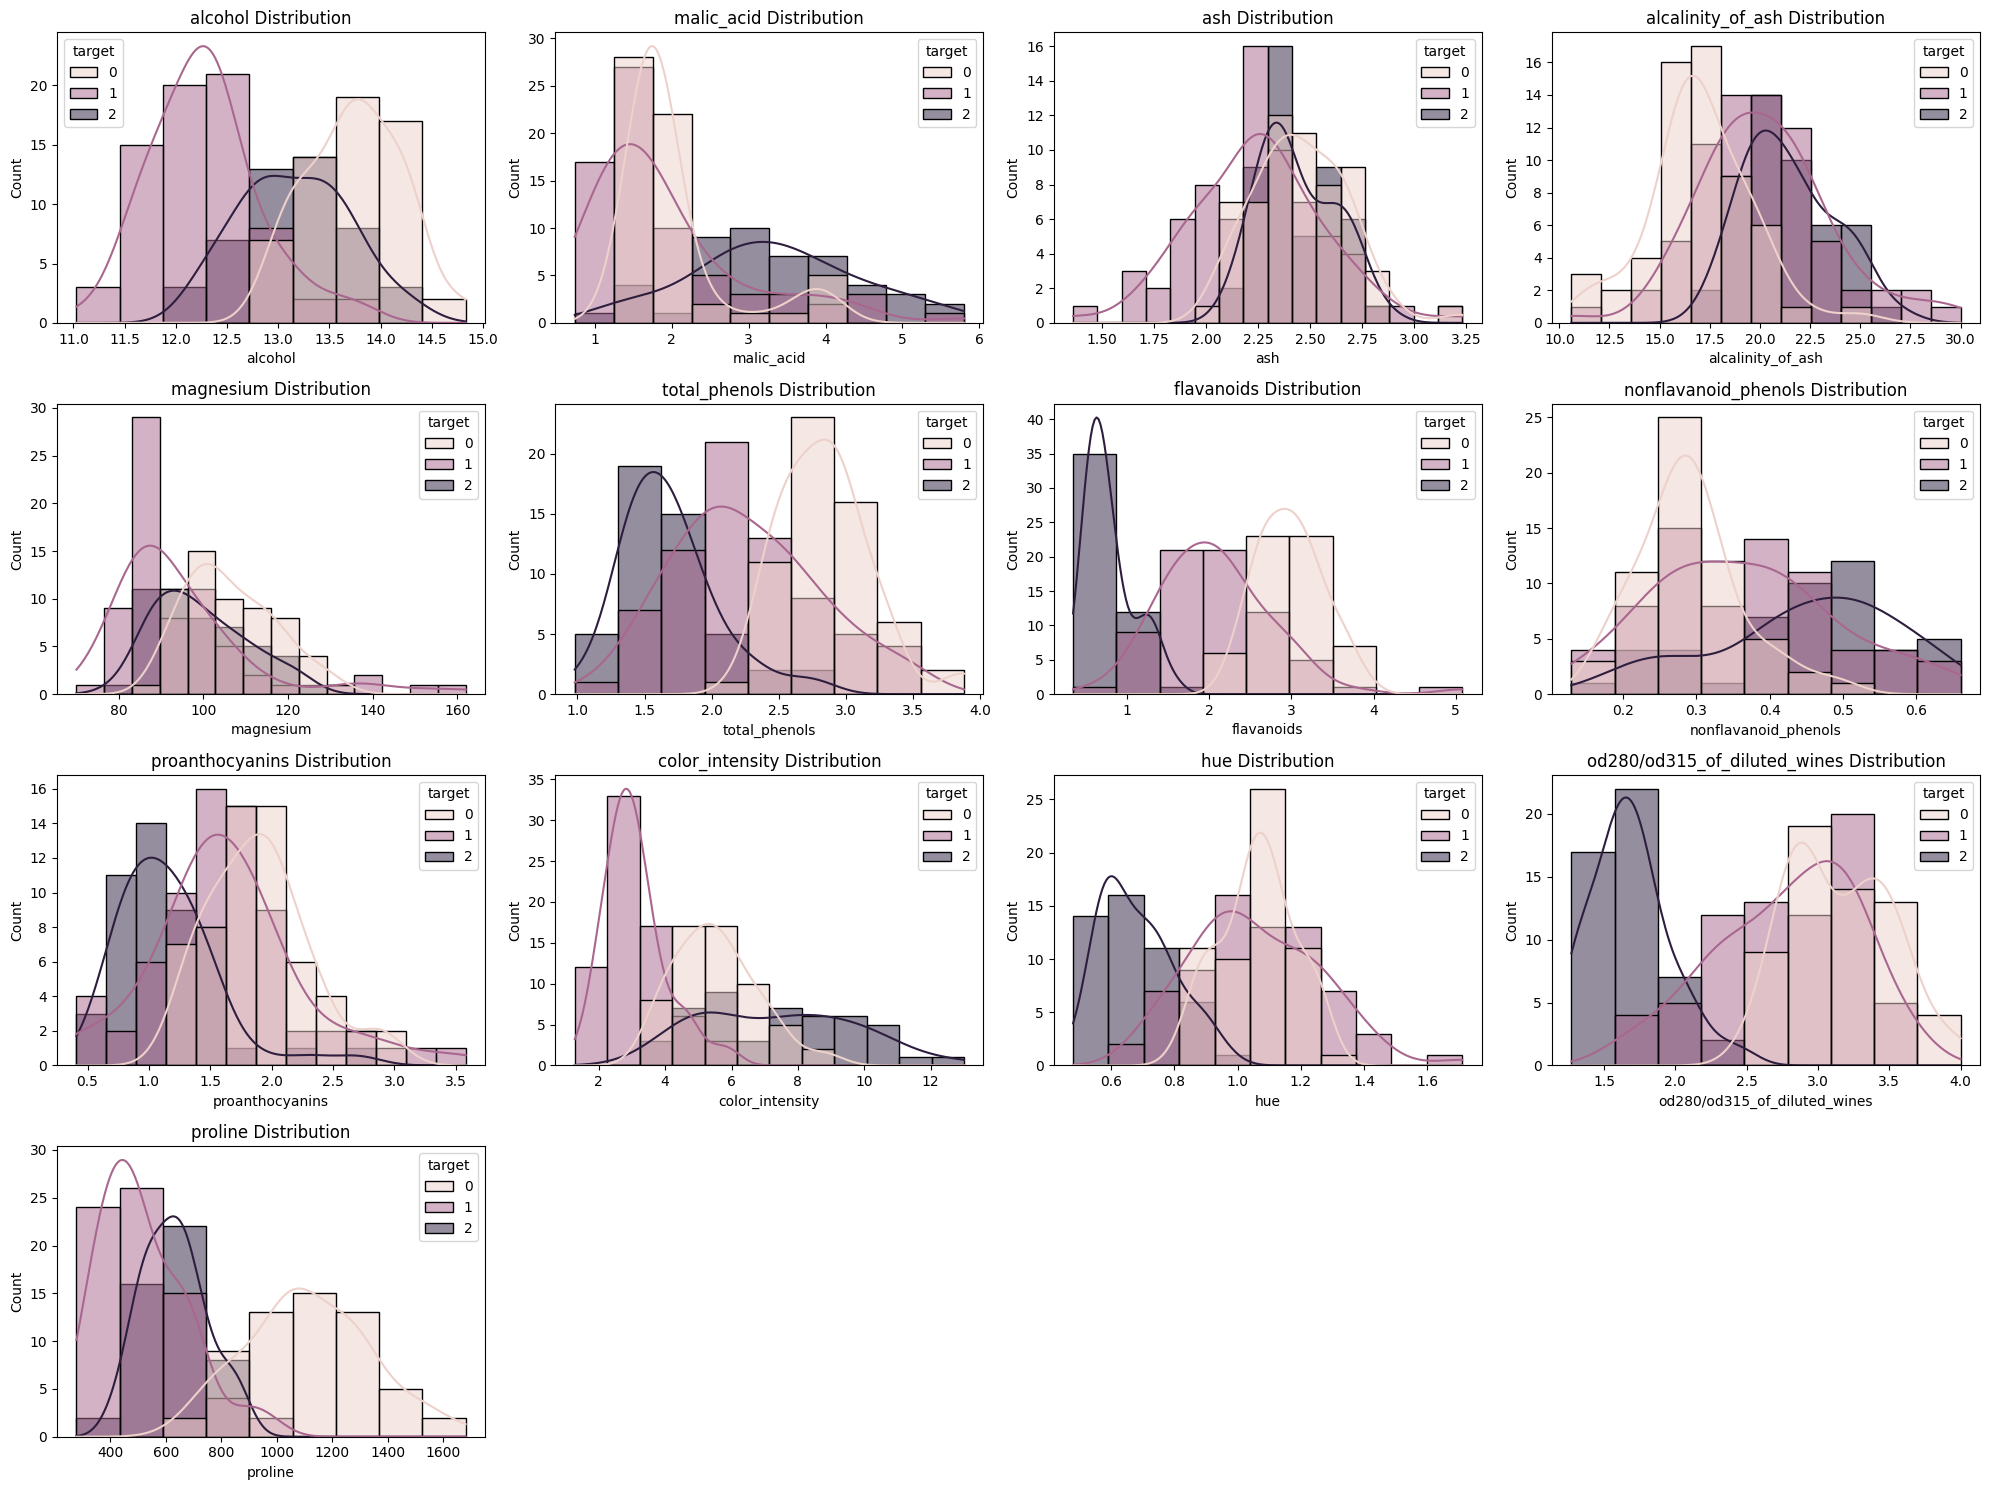

In [34]:
# Trực quan hóa phân phối của mỗi đặc trưng bằng biểu đồ tần suất.
plt.figure(figsize=(20, 15))
for i, feature in enumerate(column_names[:-1]):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=df, x=feature, hue='target', kde=True) 
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()


Ở đây, bạn có thể thấy sự phân phối dữ liệu tương tự theo loại cho các đặc trưng sau: ash, độ kiềm của ash, và magiê.

## Bản đồ nhiệt tương quan (Correlation heatmaps)
Bản đồ nhiệt tương quan có thể là công cụ hữu ích nhất để xác định các mối tương quan dương và âm giữa các thuộc tính.

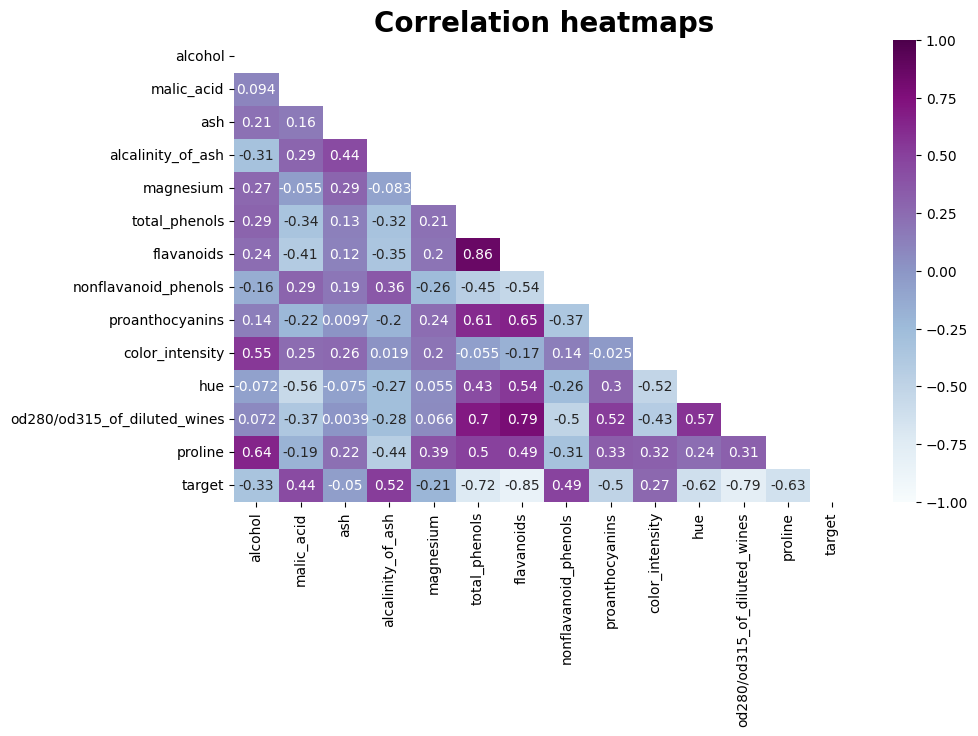

In [35]:
# Lưu ý về vấn đề với phiên bản cũ của seaborn: https://github.com/mwaskom/seaborn/issues/3478

corr = df.corr()
plt.figure(figsize=(10,6))

# Tạo mặt nạ cho tam giác trên
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr,
            mask=mask,  # Áp dụng mặt nạ để ẩn tam giác trên
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="BuPu",
            vmin=-1,
            vmax=1,
            annot=True)
plt.title("Correlation heatmaps", fontsize=20, fontweight='bold')
plt.show()

Các ô tối hơn chỉ ra mối tương quan dương, trong khi các ô màu xám sáng/trắng báo hiệu mối tương quan âm giữa các đặc trưng. Ví dụ, bạn có thể thấy một mối tương quan dương cao giữa flavonoids và total phenols ở mức 86%.

# Chia bộ dữ liệu
Dựa trên phân tích khám phá, bạn có thể kết luận rằng có một số đặc trưng có mối tương quan trong bộ dữ liệu và mô hình có thể hưởng lợi từ việc sử dụng PCA để giảm số chiều trong dữ liệu.

Từ đây, bạn chia bộ dữ liệu thành hai bộ: một bộ huấn luyện và một bộ kiểm tra.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Chuẩn hóa các điểm dữ liệu thông qua việc thay đổi tỷ lệ đặc trưng

Tiếp theo, bạn chuẩn hóa dữ liệu bằng cách thay đổi tỷ lệ và căn chỉnh dữ liệu để có trung bình bằng không và độ lệch chuẩn bằng một. Đây là một thực hành phổ biến khi thực hiện PCA vì phương pháp này bị ảnh hưởng bởi các biến có tỷ lệ khác nhau. Nếu không chuẩn hóa dữ liệu, PCA có thể sẽ đặt trọng số lớn hơn vào các biến có tỷ lệ lớn hơn, dẫn đến việc đánh giá sai sự quan trọng của chúng. Để đọc thêm về tầm quan trọng của việc thay đổi tỷ lệ đặc trưng, hãy khám phá [tài liệu của scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).

In [37]:
# Thay đổi tỷ lệ và căn chỉnh dữ liệu
sc = StandardScaler()

# Bài tập: sử dụng sc và phương thức .fit_transform để thay đổi tỷ lệ bộ huấn luyện và bộ kiểm tra
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Xác định giá trị tối ưu cho tham số n_components

Có một vài cách khác nhau để bạn xác định giá trị lý tưởng cho tham số n_components để áp dụng PCA một cách hiệu quả. Thông qua hai biểu đồ trực quan phổ biến, bạn có thể xác định số lượng thành phần chính tối ưu để thu được thông tin nhiều nhất từ bộ dữ liệu gốc.

Biểu đồ trực quan đầu tiên là biểu đồ tỷ lệ phương sai giải thích của từng thành phần và tỷ lệ phương sai tổng cộng được các thành phần chính thu được.


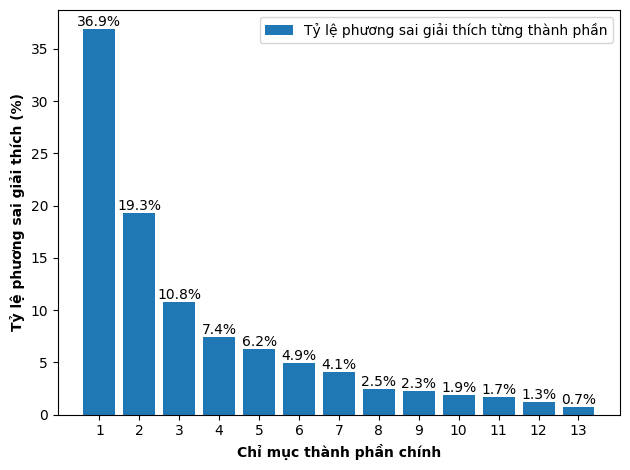

In [38]:
# Tính toán ma trận hiệp phương sai, giá trị riêng và vector riêng
cov_mat = np.cov(X_train_scaled.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

exp_var = []

# Sắp xếp các giá trị riêng theo thứ tự giảm dần
eigen_vals = np.sort(eigen_vals)[::-1]

for i in eigen_vals:
  var = (i / np.sum(eigen_vals)) * 100
  exp_var.append(var)

bar = plt.bar(range(1, 14), exp_var, align='center',
        label='Tỷ lệ phương sai giải thích từng thành phần')

# Thêm nhãn dữ liệu lên phía trên các cột
for i, bar in enumerate(bar):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{exp_var[i]:.1f}%', 
             ha='center', va='bottom')

plt.ylabel('Tỷ lệ phương sai giải thích (%)', fontweight='bold')
plt.xlabel('Chỉ mục thành phần chính', fontweight='bold')
plt.xticks(ticks=list(range(1, 14)))
plt.legend(loc='best')
plt.tight_layout()

Ở đây, bạn đang tìm số lượng thành phần giải thích phần lớn phương sai trong dữ liệu. Bạn có thể muốn chọn số lượng thành phần giải thích 80-90% sự biến thiên để đảm bảo rằng bạn đang nắm bắt được hầu hết thông tin từ bộ dữ liệu ban đầu. Bằng cách chọn năm thành phần, 83.6% phương sai sẽ được giải thích từ bộ dữ liệu ban đầu.

Biểu đồ trực quan thứ hai là biểu đồ scree.

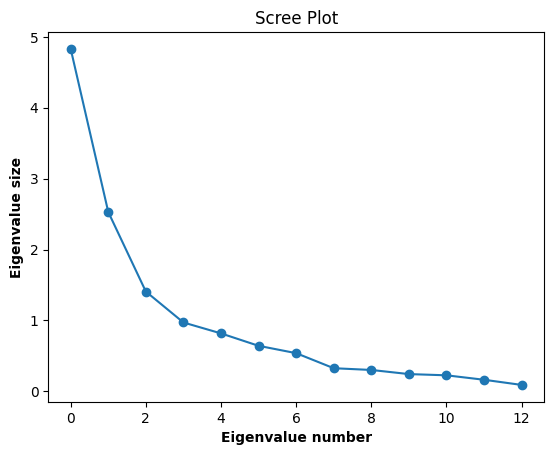

In [39]:
# generate scree plot
pca = PCA()
X_train = pca.fit_transform(X_train_scaled)
explained_variance = pca.explained_variance_ratio_
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number", fontweight='bold')
plt.ylabel("Eigenvalue size", fontweight='bold')
plt.title("Scree Plot");

Ở đây, bạn đang tìm điểm mà đường cong "gập lại" (elbow). Biểu đồ trực quan này cho thấy rằng hai hoặc ba thành phần chính có thể là lý tưởng.

Thông qua việc kiểm tra bằng mắt vào hai biểu đồ này, bạn sẽ sử dụng hai thành phần chính, nhưng thông qua thử nghiệm và sai sót, bạn cũng có thể kiểm tra số lượng thành phần nào mang lại kết quả tốt nhất.

# Áp dụng PCA vào dữ liệu huấn luyện đã chuẩn hóa

Bây giờ bạn đã biết tập con các thành phần mà bạn sẽ chọn, bạn có thể tiến hành áp dụng PCA vào bộ dữ liệu. Trong bước này, bạn đang áp dụng một phép biến đổi vuông góc để tạo một tổ hợp tuyến tính của các đặc trưng từ bộ dữ liệu gốc. Mặc dù bạn có thể sử dụng thêm nhiều thành phần chính hơn, nhưng hai thành phần chính đã giải thích phần lớn (56.2%) phương sai trong bộ dữ liệu. Vì đây không phải là 80-90% sự biến thiên mà bạn thường tìm kiếm, đáng chú ý là bạn sẽ mất một số thông tin từ bộ dữ liệu ban đầu.

In [40]:
# Khởi tạo PCA và thiết lập số lượng thành phần là 2
pca = PCA(n_components=2)

# Áp dụng PCA vào dữ liệu huấn luyện đã chuẩn hóa và biến đổi dữ liệu
# Điều này giảm chiều dữ liệu xuống còn 2 thành phần chính
principalComponents = pca.fit_transform(X_train_scaled)

# Tạo DataFrame từ các thành phần chính với tên cột thích hợp
# DataFrame này hiện chứa dữ liệu đã giảm chiều
pca_df = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# Đặt lại chỉ số của DataFrame PCA
# Điều này hữu ích nếu dữ liệu ban đầu có chỉ số khác và đảm bảo sự đồng bộ khi nối dữ liệu
pca_df.reset_index(drop=True, inplace=True)

# Tương tự, đặt lại chỉ số của DataFrame y_train
# Điều này đảm bảo rằng biến mục tiêu sẽ được căn chỉnh đúng với các thành phần chính
y_train.reset_index(drop=True, inplace=True)

# Chuyển y_train thành DataFrame nếu chưa có
# Bước này đảm bảo tính tương thích khi nối với DataFrame PCA
y_train = pd.DataFrame(y_train)

# Tạo DataFrame PCA cuối cùng
# Vào thời điểm này, pca_df đã chứa các thành phần chính, vì vậy ta sử dụng trực tiếp nó
final_pca_df = pca_df

# Thêm biến mục tiêu vào DataFrame PCA cuối cùng
# Điều này sẽ thêm biến mục tiêu dưới dạng một cột mới, căn chỉnh nó với các thành phần chính
final_pca_df['target'] = y_train

<details>
    <summary>Click here</summary>

Giải thích:
- Đoạn mã trên thực hiện PCA với 2 thành phần chính và giảm chiều dữ liệu xuống còn 2 thành phần.
- Sau đó, kết quả được lưu vào `DataFrame` và biến mục tiêu `y_train` được thêm vào để tạo ra một bộ dữ liệu cuối cùng có cả các thành phần chính và nhãn mục tiêu.

</details>


# Trực quan hóa kết quả
Bạn sử dụng biểu đồ phân tán để vẽ và trực quan hóa các thành phần chính, điều này cung cấp một cái nhìn 2 chiều về bộ dữ liệu gốc có 13 chiều.


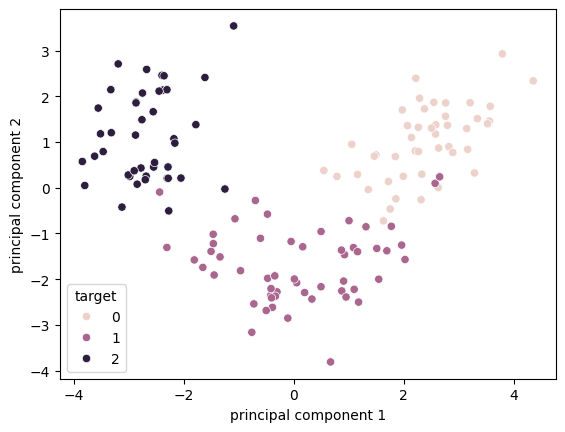

In [41]:
ax = sns.scatterplot(x =final_pca_df.iloc[:,0], y = final_pca_df.iloc[:,1],
                        hue = 'target',
                        data=final_pca_df,
                        legend=True)
plt.show()

Ở đây, bạn cũng có thể quan sát sự phân tách lớp giữa các loại rượu vang khác nhau trong bộ dữ liệu trong không gian dữ liệu đã được chiếu.

# Tóm tắt và các bước tiếp theo
Trong hướng dẫn này, bạn đã học cách áp dụng PCA để giảm chiều dữ liệu của bộ dữ liệu rượu vang có 13 chiều. Trong các hướng dẫn tương lai, bạn sẽ áp dụng kỹ thuật này để trực quan hóa dữ liệu có chiều cao và tối ưu hóa hiệu suất.

Xây dựng chiến lược trí tuệ nhân tạo (AI) cho doanh nghiệp của bạn trên một nền tảng hợp tác AI và dữ liệu có tên là IBM [watsonx](https://www.ibm.com/watsonx?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-519&cm_sp=ibmdev-_-developer-_-product), kết hợp khả năng AI sinh tạo mới được hỗ trợ bởi các mô hình nền tảng và học máy truyền thống thành một nền tảng mạnh mẽ bao phủ toàn bộ vòng đời AI. Với [watsonx.ai](https://www.ibm.com/products/watsonx-ai?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-519&cm_sp=ibmdev-_-developer-_-product), bạn có thể huấn luyện, xác thực, tinh chỉnh và triển khai các mô hình một cách dễ dàng và xây dựng ứng dụng AI trong một khoảng thời gian ngắn với lượng dữ liệu ít.

Hãy thử [watsonx.ai](https://www.ibm.com/products/watsonx-ai?utm_source=skills_network&utm_content=in_lab_content_link&utm_id=Lab-519&cm_sp=ibmdev-_-developer-_-product), studio thế hệ tiếp theo dành cho những người xây dựng AI. Khám phá thêm các bài viết và hướng dẫn [về watsonx](https://developer.ibm.com/components/watsonx) trên IBM Developer.

Ngoài ra, để tìm hiểu thêm về các thuật toán học có giám sát khác mà bạn có thể áp dụng cho các bài toán phân loại và hồi quy, hãy tham khảo các hướng dẫn này trong lộ trình học [Bắt đầu với học máy](https://developer.ibm.com/learningpaths/learning-path-machine-learning-for-developers):

[Hướng dẫn: Học các thuật toán phân loại với Python và scikit-learn](https://developer.ibm.com/learningpaths/learning-path-machine-learning-for-developers/learn-classification-algorithms)
[Hướng dẫn: Học các thuật toán hồi quy với Python và scikit-learn](https://developer.ibm.com/learningpaths/learning-path-machine-learning-for-developers/learn-regression-algorithms)

---


# Congratulations! You have completed the lab


## Authors


Eda Kavlakoglu

<br>

Sina Nazeri   ([linkedin](https://www.linkedin.com/in/sina-nazeri))


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-01-15|0.1|Sina Nazeri|Create Lab Template|


Copyright © 2023 IBM Corporation. All rights reserved.
